# Advance Bank Term Deposit

## Introduction
This notebook provides a detailed analysis of customer behavior and insights into factors influencing term deposit subscription.

## Load Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
df = pd.read_csv(r"C:\Users\Admin\Downloads\1744721963590\data.csv",encoding="latin1")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Customer Demographics Analysis

In [3]:
# Age distribution
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

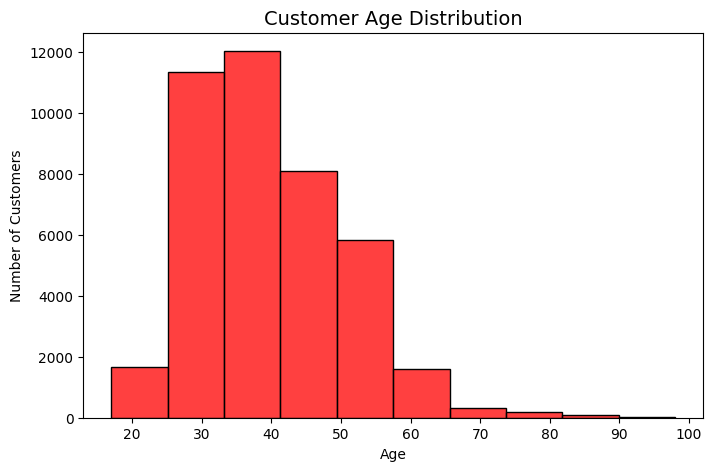

In [4]:

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=10, color='red')
plt.title('Customer Age Distribution', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

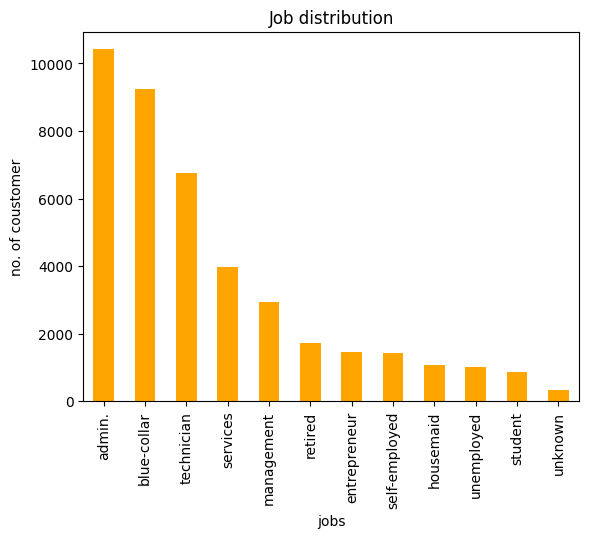

In [5]:
# Job distribution
df['job'].value_counts().plot(kind='bar',color='orange')
plt.title("Job distribution")
plt.xlabel("jobs")
plt.ylabel("no. of coustomer")
plt.xticks(rotation=90)
plt.show()

## Balance & Deposit Trends

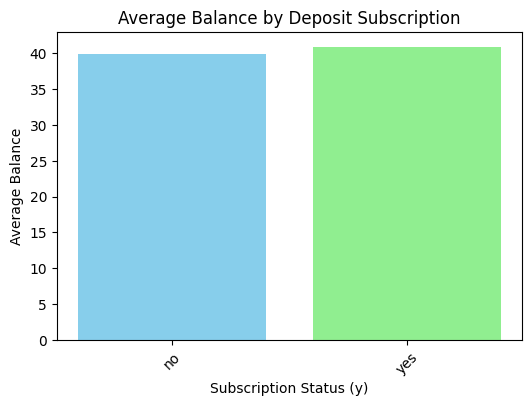

In [6]:
# Average balance by deposit subscription
avg_balance = df.groupby('y')['age'].mean().reset_index()

# Plotting
plt.figure(figsize=(6,4))
plt.bar(avg_balance['y'], avg_balance['age'], color=['skyblue', 'lightgreen'])
plt.title('Average Balance by Deposit Subscription')
plt.xlabel('Subscription Status (y)')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.show()

## Campaign Effectiveness

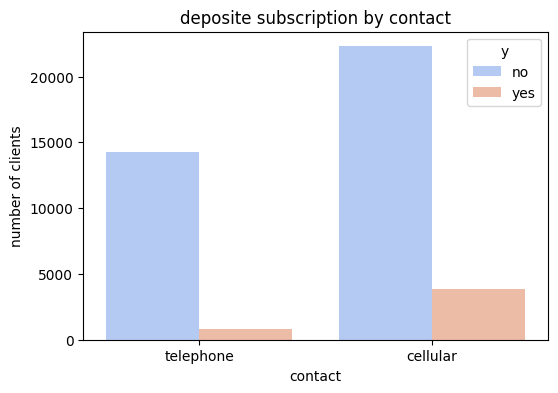

In [7]:
# Contact method analysis
plt.figure(figsize=(6,4))
sns.countplot(x='contact',hue='y',data=df,palette="coolwarm")
plt.title("deposite subscription by contact")
plt.xlabel("contact")
plt.ylabel("number of clients")
plt.show()

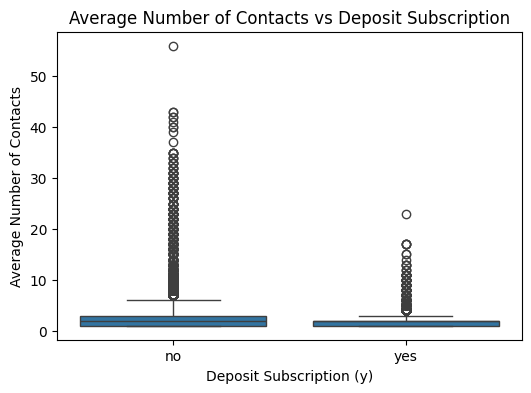

In [8]:
# Number of contacts vs deposit subscription
contact = df.groupby('y')['campaign'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.boxplot(x='y',y='campaign',data=df)
plt.title('Average Number of Contacts vs Deposit Subscription')
plt.xlabel('Deposit Subscription (y)')
plt.ylabel('Average Number of Contacts')
plt.show()

## Correlation Heatmap

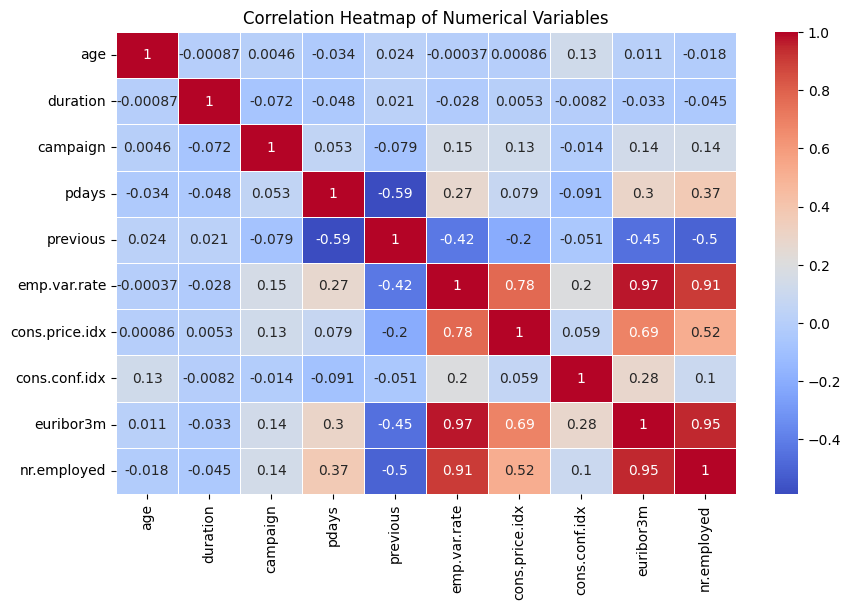

In [9]:
# Correlation of numerical variables
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## Predictive Modeling (Logistic Regression)

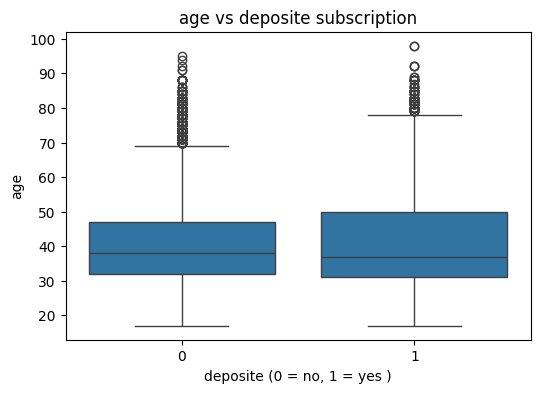

In [10]:
# Encode categorical variable
df['y']=df['y'].map({'yes':1,'no':0})
# Predictions
plt.figure(figsize=(6,4))
sns.boxplot(x='y',y='age',data=df)
plt.title("age vs deposite subscription")
plt.xlabel('deposite (0 = no, 1 = yes )')
plt.ylabel('age')
plt.show()

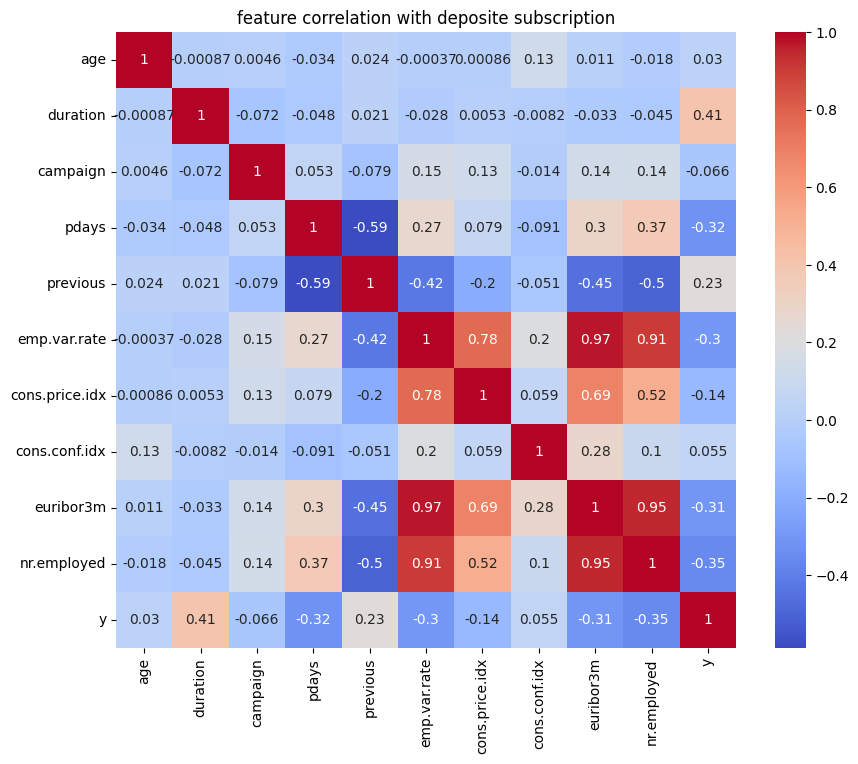

In [11]:
# Feature importance
numeric_df=df.select_dtypes(include='number')
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')
plt.title("feature correlation with deposite subscription")
plt.show()

## Key Takeaways
- Certain age groups and job categories are more likely to subscribe.
- Higher balances correlate with higher subscription rates.
- Cellular contact is more effective than telephone.
- Campaign duration and number of contacts influence outcomes.
- Logistic regression shows which features are strongest predictors.